In [20]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt 
%matplotlib inline
df_invoice = pd.read_csv('data_code/invoice.csv', index_col = 'Invoice_id' )
df_invoice.head()

,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,County_id,County_Name,Bottles_Sold
Invoice_id,,,,,,,,,,,,
INV-00013400001,2016-08-29,35918,297,Katou Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
INV-00013400002,2016-08-29,23828,297,Katou Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
INV-00013400003,2016-08-29,36908,300,Katsuragi Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
INV-00013400004,2016-08-29,34359,35,Archer Inc.,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,8
INV-00013400005,2016-08-29,36903,300,Katsuragi Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1


In [21]:
df_invoice.Bottles_Sold.describe()

count    930508.000000
mean          9.875647
std          22.489171
min           0.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        2160.000000
Name: Bottles_Sold, dtype: float64

In [ ]:
# look for the query for 73 sales marked as having sold 0 bottles. 

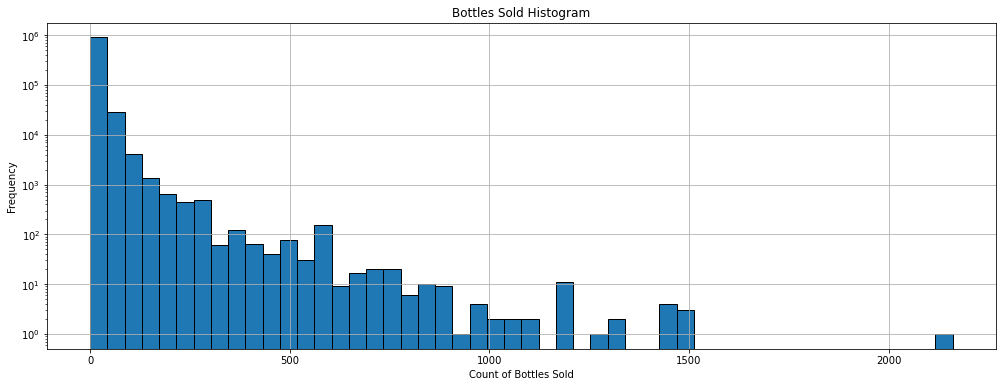

In [25]:
f,ax=plt.subplots(figsize=(17,6))
df_invoice.Bottles_Sold.hist(ax=ax, bins= 50, edgecolor='black')
ax.set_title('Bottles Sold Histogram')
plt.xlabel('Count of Bottles Sold')
plt.ylabel('Frequency')
plt.yscale("log")
plt.show()

In [17]:
df_invoice.Store_id.describe()

count    930508.000000
mean       3475.512880
std         889.217119
min        2554.000000
25%        2623.000000
50%        3447.000000
75%        4076.000000
max        9922.000000
Name: Store_id, dtype: float64

In [16]:
df_invoice.City_Name.describe()

count        930508
unique            2
top       DAVENPORT
freq         569608
Name: City_Name, dtype: object

In [5]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930508 entries, INV-00013400001 to S34122500017
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          930508 non-null  object
 1   Item_id       930508 non-null  int64 
 2   Vendor_id     930508 non-null  int64 
 3   Vendor_Name   930508 non-null  object
 4   Store_id      930508 non-null  int64 
 5   Store_Name    930508 non-null  object
 6   Address       930508 non-null  object
 7   City_Name     930508 non-null  object
 8   Zip_Code      930508 non-null  int64 
 9   County_id     930508 non-null  int64 
 10  County_Name   930508 non-null  object
 11  Bottles_Sold  930508 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 92.3+ MB


In [6]:
df_invoice['Date'].value_counts()

2013-12-18    3021
2013-12-04    2897
2014-08-06    2878
2014-07-09    2807
2013-12-30    2791
              ... 
2017-12-05       1
2016-10-14       1
2017-05-30       1
2014-05-22       1
2017-12-26       1
Name: Date, Length: 1021, dtype: int64

In [21]:
df_invoice['Date'].value_counts(normalize = True)

2013-12-18    0.003247
2013-12-04    0.003113
2014-08-06    0.003093
2014-07-09    0.003017
2013-12-30    0.002999
                ...   
2017-12-08    0.000001
2016-11-29    0.000001
2014-06-12    0.000001
2017-01-27    0.000001
2017-02-21    0.000001
Name: Date, Length: 1021, dtype: float64

In [23]:
df_invoice['Item_id'].value_counts()

36904     9028
36308     6381
36886     6343
36908     6229
11788     5824
          ... 
904481       1
37436        1
1176         1
903969       1
903442       1
Name: Item_id, Length: 4165, dtype: int64

In [24]:
df_invoice['Item_id'].value_counts(normalize = True)

36904     0.009702
36308     0.006858
36886     0.006817
36908     0.006694
11788     0.006259
            ...   
904481    0.000001
37436     0.000001
1176      0.000001
903969    0.000001
903442    0.000001
Name: Item_id, Length: 4165, dtype: float64

In [8]:
df_invoice['Vendor_id'].value_counts()

260    156106
65      88201
434     76563
370     57687
35      49121
        ...  
324         1
310         1
283         1
298         1
507         1
Name: Vendor_id, Length: 155, dtype: int64

In [9]:
df_invoice['Vendor_Name'].value_counts()

Inuyasha Brands    156106
Ayanami Brands      88201
Minami LLC          76563
Kyon Inc.           57687
Archer Inc.         49121
                    ...  
Cifer LLC               1
Ichihara LLC            1
Nishimiya LLC           1
Oikawa Beverage         1
Dazai LLC               1
Name: Vendor_Name, Length: 155, dtype: int64

In [10]:
df_invoice['Store_id'].value_counts()

2614    74074
2625    61716
2623    55706
3820    44947
2621    43824
        ...  
5496      147
5130       93
5506       75
9022        9
9922        5
Name: Store_id, Length: 102, dtype: int64

In [11]:
df_invoice['Store_Name'].value_counts()

Hy-Vee #3 Food and Drugstore         74074
Hy-Vee Convenience Store #2          61716
Hy-Vee Food Store #4 / Sioux City    55706
Charlie's Convenience Store,         44947
Hy-Vee Food Store #3 / Sioux City    43824
                                     ...  
Bacon Creek Country Store              197
Dhakals LLC                            147
Great River Craft Soda                  93
Casey's General Store #2168             75
Artisan Craft Soda                      14
Name: Store_Name, Length: 98, dtype: int64

In [12]:
df_invoice['Address'].value_counts()

1823 E KIMBERLY RD         74074
3301 W KIMBERLY RD         61716
2827 HAMILTON BLVD         55706
507 W 19th St              44947
3301 GORDON DR             43824
                           ...  
3108 W Central Park Ave      147
332, E  2ND ST                93
1691 W 53rd St                75
318, E 2nd St.                 9
318 E 2nd St.                  5
Name: Address, Length: 98, dtype: int64

In [13]:
df_invoice['City_Name'].value_counts()

DAVENPORT     569608
SIOUX CITY    360900
Name: City_Name, dtype: int64

In [14]:
df_invoice['Zip_Code'].value_counts()

52807    182683
52804    155865
52806    106874
51106    101757
51104     69081
52802     67939
51103     62986
51105     56927
52803     37296
51108     30964
51101     30395
52084     17145
51109      8790
52801      1806
Name: Zip_Code, dtype: int64

In [15]:
df_invoice['County_Name'].value_counts()

Scott       569608
Woodbury    360900
Name: County_Name, dtype: int64

In [16]:
df_invoice['County_id'].value_counts()

82    569608
97    360900
Name: County_id, dtype: int64

# What questions to ask about the data? 

1. Which vender is buying the most? 
1. What item is the most popular item?
1. What item is the least popular item? 
1. How many bottles on average are sold?
1. What are the sales by month? Plot it by month over the 4 years. 
1. What are the differences between the two cities? 

In [15]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("data_code/invoices.sqlite")

cur = con.cursor()

# Return all results of query
cur.execute('Select * from invoices')
cur.fetchall()

# Return first result of query
cur.execute('Select * from invoices')
cur.fetchone()

# Be sure to close the connection
con.close()

OperationalError: no such table: invoices